# Uses Clasification and Regression Tree (CART) to visualize relationships within the datasets

In [15]:
import pandas as pd
import CART_Backend as CART
import importlib
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib notebook
DataPath = 'C:\\Users\\wesle\\Illisarvik_Processing/Data_Footprints_2018-05-06.csv'

# DataPath = 'C:/FishIsland_2017/AllData.csv'
Data = pd.read_csv(DataPath,delimiter = ',',header = 0,na_values = -9999)
Data = Data.set_index(pd.DatetimeIndex(pd.to_datetime(Data['datetime'])))
# for var in Data:
#     print(var)

<IPython.core.display.Javascript object>


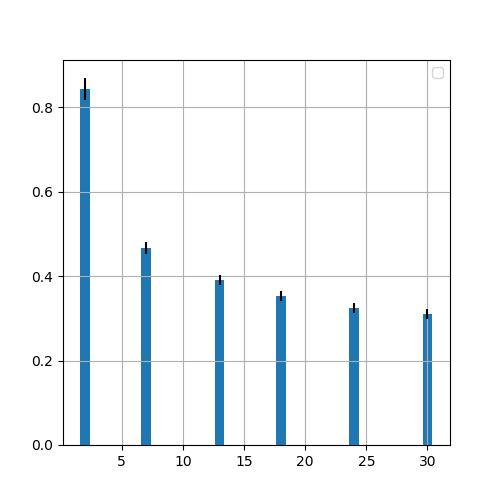

2
0.843224716539 0.216831046078
7
0.466146175411 0.117620853905
13
0.390158818015 0.100126367733
18
0.352531905568 0.104358608202
24
0.323675373122 0.0993188397881
30


No handles with labels found to put in legend.


0.31015258286 0.0934432716802
         CI       MSE   N       STD
0  0.025337  0.843225   2  0.216831
1  0.013744  0.466146   7  0.117621
2  0.011700  0.390159  13  0.100126
3  0.012195  0.352532  18  0.104359
4  0.011606  0.323675  24  0.099319
5  0.010919  0.310153  30  0.093443


In [21]:
importlib.reload(CART)
Vars = ['wind_speed','Sedge','Shrub','PPFD_Avg','Temp','AirTC_Avg','u*','air_pressure','VWC','Z_L']
# Vars = ['wind_speed','PPFD_Avg','AirTC_Avg','u*','air_pressure','VWC','Active Layer',
#        'Temp_2_5_1','Temp_15_1']
tree = CART.Trees(Data,'fch4',Vars)
# print(tree.Master.shape)
# print(tree.XFill.shape)

fig,ax = plt.subplots(1,1,figsize=(5,5))
tree.Validate_Forest(N_Max=30,samp_size=6,ax=ax)
ax.grid()
ax.legend()

<IPython.core.display.Javascript object>


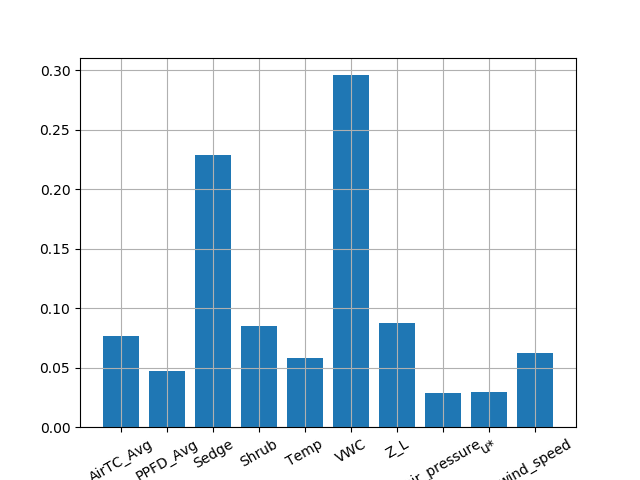

<IPython.core.display.Javascript object>


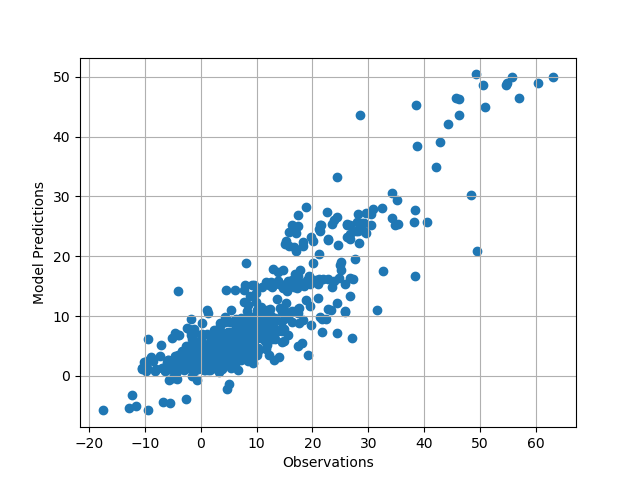

<IPython.core.display.Javascript object>


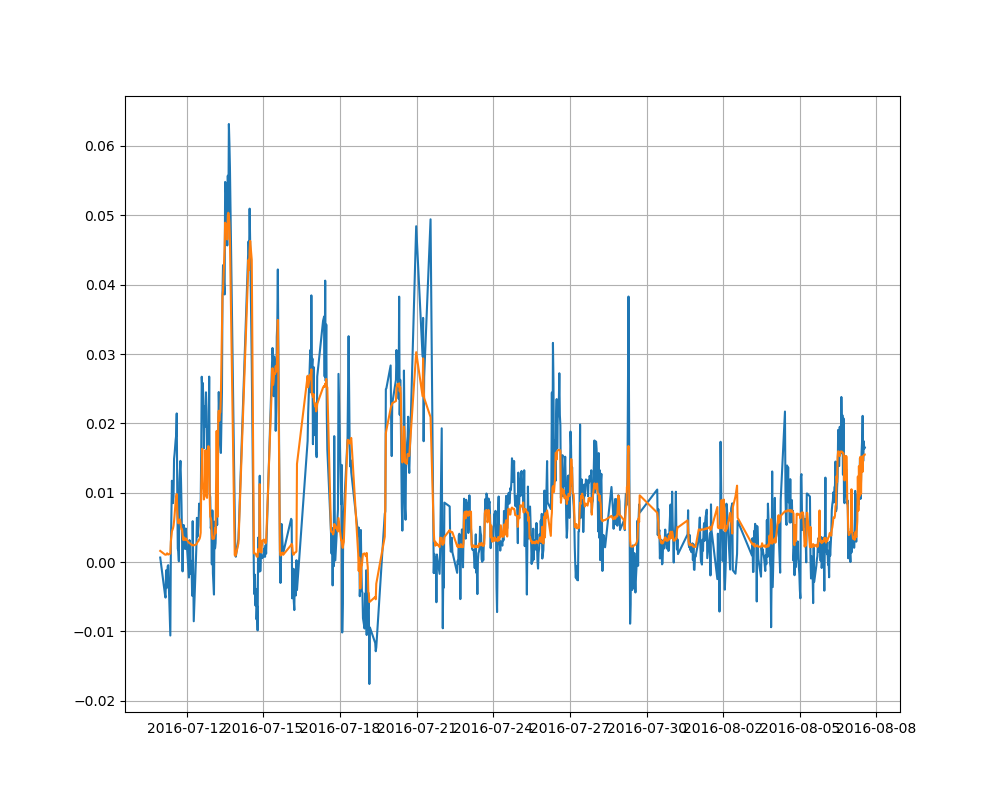

0.787165129414


In [25]:

i=3
plt.figure()
plt.bar(Vars,tree.Features[i])
plt.grid()
plt.xticks(rotation=30)
plt.figure()
pred = tree.YScaled.inverse_transform(tree.Yfills[i].reshape(-1,1)).flatten()
# Data = tree.Data
tree.Master['Pred'] = pred
y = tree.YScaled.inverse_transform(tree.y.reshape(-1,1)).flatten()
plt.scatter(y*1000,pred*1000)
plt.grid()
plt.ylabel('Model Predictions')
plt.xlabel('Observations')

slope, intercept, r_value, p_value, std_err = stats.linregress(y,pred)

plt.figure(figsize = (10,8))
plt.plot(tree.Master['fch4'],label='Observations')
plt.plot(tree.Master['Pred'],label='Modeled')
plt.grid()

print(r_value**2)